<h1 align="center"> Red Wine Quality </h1>
<br>The entire dataset is grouped into two categories: red wine and white wine. </br>
Each wine has a quality label associated with it. The label is in the range of 0 to 10. 

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Importing Data Set</li>
        <li>Understanding the Data</li>
        <li>Normality Test</li>  
        <li>Cleaning of The Outliers</li>  
        <li>Transforms Data Into a Normal Distribution</li>  
        <li>Multicollinearity check</li>
        <li>Dataset Preprocessing</li>
        <li>Dataset Train/Test Split</li> 
        <li>Handeling Imbalanced Data</li> 
        <li>Decision Tree</li> 
        <li>SVC with Gaussian RBF Kerne</li> 
        <li>Random Forest</li> 

<h2> About The Dataset </h2>

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):

|    |             |
| ---| ----------- |
|1   | - fixed acidity|
|2   | - volatile acidity|
|3   | - citric acid|
|4   | - residual sugar|
|5   | - chlorides|
|6   | - free sulfur dioxide|
|7   | - total sulfur dioxide|
|8   | - density|
|9   | - pH|
|10  | - sulphates|
|11  | - alcohol|

Output variable (based on sensory data):

|    |             |
| ---| ----------- |
|12  | - quality (score between 0 and 10)|

In [1]:
#install the opendatasets package
#!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

This function is to plot the confusion matrix.

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive']) 
    plt.show() 

## - Importing Data Set

In [4]:
#download the datasets
#od.download('https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/download?datasetVersionNumber=2')

In [5]:
#read the input data
df = pd.read_csv('red-wine-quality-cortez-et-al-2009\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## - Understanding the Data

In [6]:
#display the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#the duplicated rows are cleaned in this part
#calculate duplicates
print('Data frame shape before duplicate cleaning', df.shape)
dups = df.duplicated()
#report if there are any duplicates
print('any duplicates:', dups.any())
#delete duplicate rows
df.drop_duplicates(inplace=True)
print('Data frame shape after duplicate cleaning',df.shape)

Data frame shape before duplicate cleaning (1599, 12)
any duplicates: True
Data frame shape after duplicate cleaning (1359, 12)


## - Normality Test

In [9]:
from scipy import stats
from scipy.stats import normaltest

In [10]:
#test for a normal distribution
#This function tests the null hypothesis that a sample comes from a normal distribution. 
for i in df.columns.values:
    a,b = stats.normaltest(df[[i]])
    alpha = 0.5
    print('p-value for',[i],'=','%.4f' %(b))
    if b < alpha:
        print('  The null hypothesis can be rejected')
    else:
        print('  The null hypothesis cannot be rejected')

p-value for ['fixed acidity'] = 0.0000
  The null hypothesis can be rejected
p-value for ['volatile acidity'] = 0.0000
  The null hypothesis can be rejected
p-value for ['citric acid'] = 0.0000
  The null hypothesis can be rejected
p-value for ['residual sugar'] = 0.0000
  The null hypothesis can be rejected
p-value for ['chlorides'] = 0.0000
  The null hypothesis can be rejected
p-value for ['free sulfur dioxide'] = 0.0000
  The null hypothesis can be rejected
p-value for ['total sulfur dioxide'] = 0.0000
  The null hypothesis can be rejected
p-value for ['density'] = 0.0000
  The null hypothesis can be rejected
p-value for ['pH'] = 0.0000
  The null hypothesis can be rejected
p-value for ['sulphates'] = 0.0000
  The null hypothesis can be rejected
p-value for ['alcohol'] = 0.0000
  The null hypothesis can be rejected
p-value for ['quality'] = 0.0012
  The null hypothesis can be rejected


Since the p-value is less than .05, we reject the null hypothesis.This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

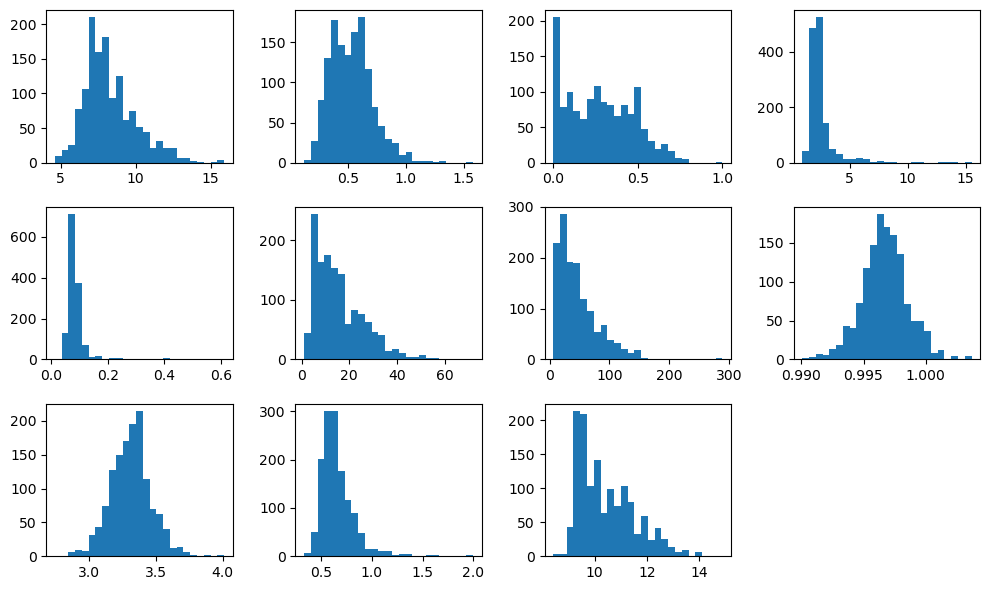

In [11]:
#Dist plot of all features:
# histogram of the data
plt.figure(figsize=(10, 6))
dfg = df.values
dfg = dfg[:, :-1]
for i in range(dfg.shape[1]):
    plt.subplot(3,4,i+1)
    plt.hist(dfg[:,i], bins=25)

plt.tight_layout()
plt.show()

## - Cleaning of The Outliers 

In [12]:
from sklearn.ensemble import IsolationForest

In [13]:
#separate into input and output columns
X = df.iloc[:, :-1] #taking all the rows and all the columns except the last column.
y = df.iloc[:, -1] #taking all the rows and only the last column

In [14]:
#a cleaning of the outliers with a IsolationForest method.
print('dataset before outlier cleaning', X.shape, y.shape)
#call and fit the Isolation Forest detector
iforest = IsolationForest(contamination=0.1).fit(X.values)
yhat = iforest.predict(X.values)
#select all rows that are not outliers
mask = yhat != -1
X = X.loc[mask, :]
y = y.loc[mask]

print('dataset after outlier cleaning:' ,X.shape, y.shape)

dataset before outlier cleaning (1359, 11) (1359,)
dataset after outlier cleaning: (1223, 11) (1223,)


## - Transforms Data Into a Normal Distribution

In [15]:
from sklearn.preprocessing import QuantileTransformer, LabelEncoder, StandardScaler

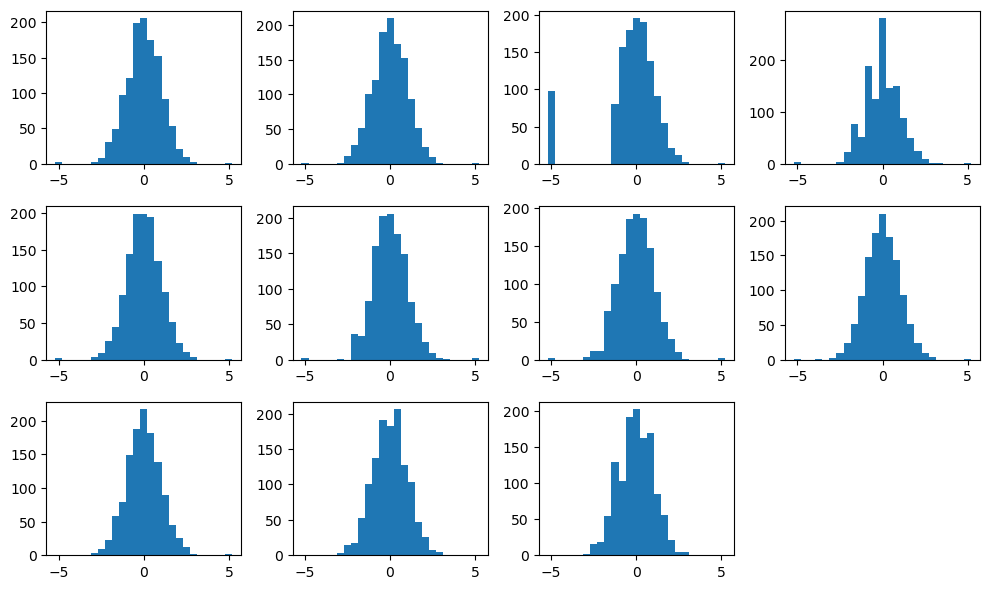

In [16]:
#map data to a normal distribution
rng = np.random.RandomState(304)
qt = QuantileTransformer(n_quantiles=500, output_distribution="normal", random_state=rng)

X_trans = qt.fit_transform(X)

# histogram of the transformed data
plt.figure(figsize=(10, 6))

for i in range(X_trans.shape[1]):
    plt.subplot(3, 4, i+1)
    plt.hist(X_trans[:,i], bins=25)
    
plt.tight_layout()
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
#normality check 
print(X_trans.shape)

for i in range(X_trans.shape[1]):
    p_val= stats.normaltest(X_trans[:,i])
    print('p-value for {} = {:.4f}'.format(i,p_val[1]))

(1223, 11)
p-value for 0 = 0.0000
p-value for 1 = 0.0002
p-value for 2 = 0.0000
p-value for 3 = 0.0000
p-value for 4 = 0.0000
p-value for 5 = 0.0000
p-value for 6 = 0.0000
p-value for 7 = 0.0001
p-value for 8 = 0.0000
p-value for 9 = 0.0001
p-value for 10 = 0.0001


It looks better but the normality test shows that the data isn't normal distributed after the transformation.
This means the results from the analysis may be not valid

## - Multicollinearity check

<AxesSubplot: >

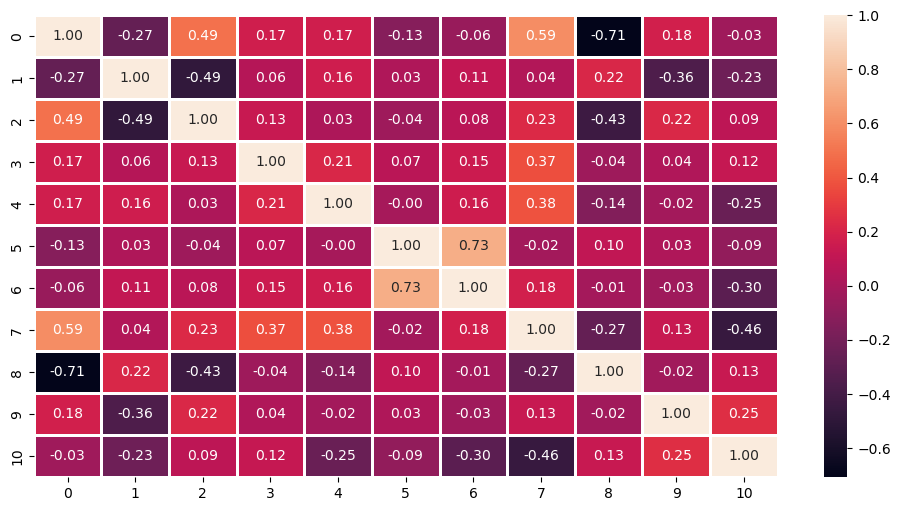

In [19]:
#find correlated columns
plt.figure(figsize=(12,6))
X_trans = pd.DataFrame(X_trans) 
sns.heatmap(X_trans.corr(), annot=True, fmt='.2f', linewidths=2)

In [20]:
# calculating VIF for each feature

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_trans.columns

vif_data["VIF"] = [variance_inflation_factor(X_trans.values, i)
                          for i in range(len(X_trans.columns))]
  
print(vif_data)

    feature       VIF
0         0  4.743585
1         1  1.578818
2         2  1.725027
3         3  1.530180
4         4  1.245123
5         5  2.398340
6         6  2.760571
7         7  4.211237
8         8  2.724703
9         9  1.334924
10       10  2.466189


The dataset is not affected by multicollinearity because VIF(Varaince inflation Factor) values get lower than 10.

## - Dataset Preprocessing
First, we need to perform one hot encoding to convert categorical variables to binary variables.Turn the 10 point scale to dichtome variable (good wine and rest)

In [21]:
y = pd.DataFrame(y)
pd.columns = ['quality']

In [22]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
y['quality'] = pd.cut(y['quality'], bins = bins, labels = group_names)

In [23]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [24]:
y.head()

,quality
0,bad
1,bad
2,bad
3,bad
5,bad


In [25]:
#Bad becomes 0 and good becomes 1 
y['quality'] = label_quality.fit_transform(y['quality'])

In [26]:
y['quality'].value_counts()

0    1069
1     154
Name: quality, dtype: int64

## - Handeling Imbalanced Data

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
os =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = os.fit_resample(X, y)

In [29]:
print(X_train_res.shape)
print(y_train_res.shape)

(2138, 11)
(2138, 1)


## - Dataset Train/Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.25, random_state=42)

In [32]:
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1603, 11) Y_train.shape= (1603, 1)
X_test.shape= (535, 11) Y_test.shape= (535, 1)


In [33]:
#Applying Standard scaling to get optimized result
#Feature scalling for SVC
sc = StandardScaler()

In [34]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## - Dicision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Train and fit the 
tree_clf = DecisionTreeClassifier(max_depth=5).fit( X_train, y_train.values.ravel())

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

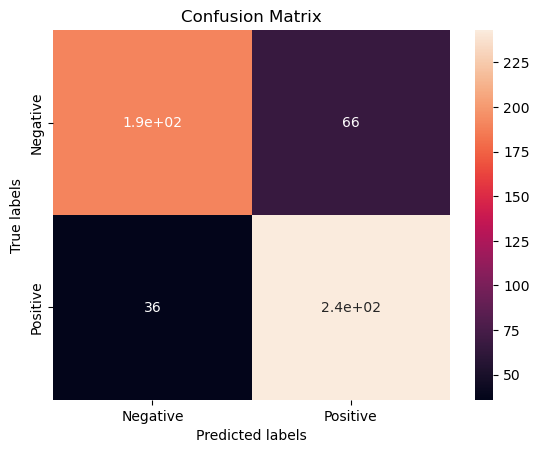

In [38]:
tree_yhat = tree_clf.predict(X_test)
plot_confusion_matrix(y_test,tree_yhat)

In [39]:
print(classification_report(y_test, tree_yhat))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       256
           1       0.79      0.87      0.83       279

    accuracy                           0.81       535
   macro avg       0.81      0.81      0.81       535
weighted avg       0.81      0.81      0.81       535



The decision tree gets the test set's accuracy of 81%.

## - SVC with Gaussian RBF Kernel

In [40]:
from sklearn.svm import SVC

In [41]:
# Train and fit the model: SVC with Gaussian RBF Kernel
svc_clf = SVC(kernel="rbf", gamma="auto", C=1, max_iter=-1).fit(X_train, y_train.values.ravel())

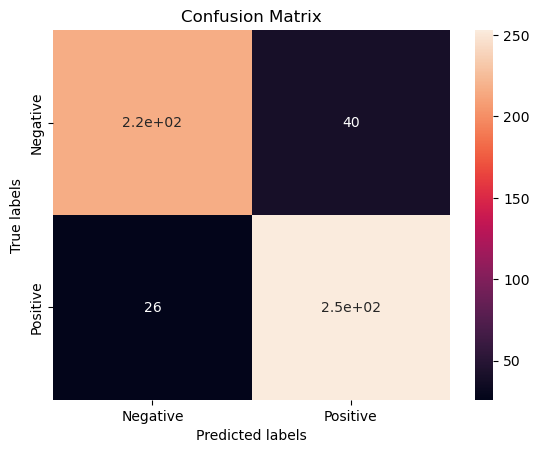

In [42]:
svc_yhat = svc_clf.predict(X_test)
plot_confusion_matrix(y_test,svc_yhat)

In [43]:
print(classification_report(y_test, svc_yhat))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       256
           1       0.86      0.91      0.88       279

    accuracy                           0.88       535
   macro avg       0.88      0.88      0.88       535
weighted avg       0.88      0.88      0.88       535



The test set's accuracy improved from 81% to 88% using SVC with a Gaussian RBF kernel.

## - Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Train and fit the model: random forest classifier
rforest_clf = RandomForestClassifier().fit(X_train, y_train.values.ravel())

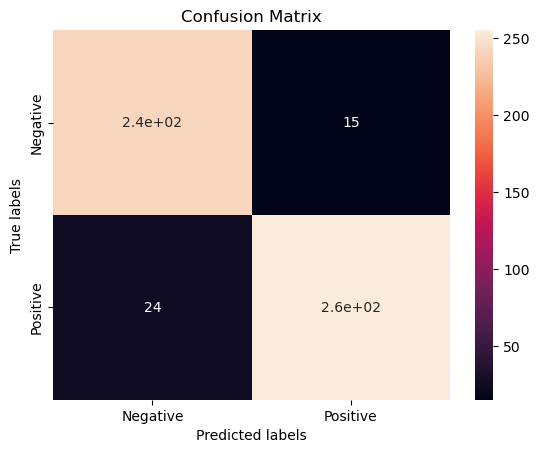

In [46]:
rforest_yhat = rforest_clf.predict(X_test)
plot_confusion_matrix(y_test,rforest_yhat)

In [47]:
print(classification_report(y_test, rforest_yhat))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       256
           1       0.94      0.91      0.93       279

    accuracy                           0.93       535
   macro avg       0.93      0.93      0.93       535
weighted avg       0.93      0.93      0.93       535



Thus, the test set's accuracy improved from 88% to 93% using Random forest.

____

Gawragod Kuchaiyaphum